### Proyecto de procesamiento

Regresiones

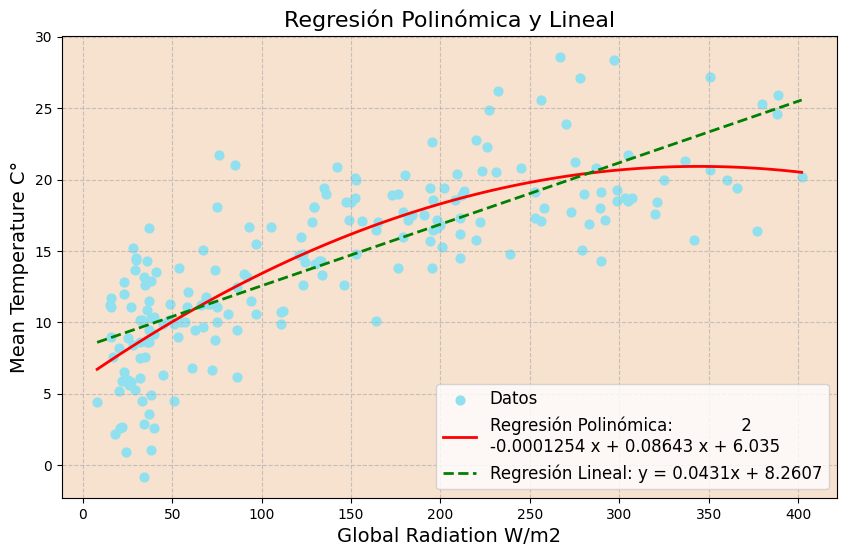

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_omni = pd.read_excel("/content/Base de datos final temperatura.xlsx")
mean_temp_mean = data_omni['mean_temp'].mean()
global_radiation_mean = data_omni['global_radiation'].mean()

data_omni['mean_temp'].fillna(mean_temp_mean, inplace=True)
data_omni['global_radiation'].fillna(global_radiation_mean, inplace=True)

# Datos de ejemplo (sustituye estos datos por los tuyos)
x = data_omni['global_radiation']
y = data_omni['mean_temp']

# Grado del polinomio (por ejemplo, polinomio de grado 3 para una curva)
grado = 2

# Ajuste del polinomio a los datos
coeficientes_polinomicos = np.polyfit(x, y, grado)

# Crear una función polinómica a partir de los coeficientes
polinomio = np.poly1d(coeficientes_polinomicos)
polinomio_str = np.poly1d(coeficientes_polinomicos)

# Ajuste de la regresión lineal
slope, intercept = np.polyfit(x, y, 1)  # Regresión lineal (grado 1)
lineal_eq = f"Regresión Lineal: y = {slope:.4f}x + {intercept:.4f}"

# Valores x para el gráfico
x_valores = np.linspace(x.min(), x.max(), 100)

# Calcular los valores de y correspondientes al polinomio
y_valores_polinomicos = polinomio(x_valores)

# Calcular los valores de y correspondientes a la regresión lineal
y_valores_lineal = slope * x_valores + intercept

# Configuración de estilo y colores
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Datos
plt.scatter(x, y, label="Datos", color='#90E0EF', marker='o', s=40)

# Regresión polinómica
plt.plot(x_valores, y_valores_polinomicos, label=f"Regresión Polinómica: {polinomio_str}", color='red', linewidth=2)

# Regresión lineal
plt.plot(x_valores, y_valores_lineal, label=lineal_eq, color='green', linestyle='--', linewidth=2)

# Etiquetas y título
plt.xlabel("Global Radiation W/m2", fontsize=14)
plt.ylabel("Mean Temperature C°", fontsize=14)
plt.title("Regresión Polinómica y Lineal", fontsize=16)

# Leyenda y estilo de la leyenda
plt.legend(loc='lower right', fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Personalización del color de fondo
plt.gca().set_facecolor('#F7E1CF')


# Mostrar el gráfico
plt.show()

Estadisticos por regresion

In [ ]:
import numpy as np

# Datos de ejemplo (sustituye estos datos por los tuyos)
x = data_omni['global_radiation']
y = data_omni['mean_temp']

# Ajuste de la regresión lineal (grado 1)
slope, intercept = np.polyfit(x, y, 1)

# Ajuste de la regresión polinómica (grado 2)
grado = 2
coeficientes_polinomicos = np.polyfit(x, y, grado)

# Crear una función polinómica a partir de los coeficientes
polinomio = np.poly1d(coeficientes_polinomicos)

# Calcular la predicción de la regresión lineal y polinómica en los datos x
y_pred_lineal = slope * x + intercept
y_pred_polinomica = polinomio(x)

# Calcular la media de y
y_media = np.mean(y)

# Calcular la desviación estándar total
sst = np.sum((y - y_media) ** 2)

# Calcular la desviación estándar del error (residuals) para la regresión lineal
residuals_lineal = y - y_pred_lineal
sse_lineal = np.sum(residuals_lineal ** 2)
mse_lineal = sse_lineal / (len(x) - 2)  # grados de libertad = n - 2 (para la regresión lineal)

# Calcular la desviación estándar del error (residuals) para la regresión polinómica
residuals_polinomica = y - y_pred_polinomica
sse_polinomica = np.sum(residuals_polinomica ** 2)
mse_polinomica = sse_polinomica / (len(x) - (grado + 1))  # grados de libertad = n - (k + 1) (para la regresión polinómica)

# Calcular el coeficiente de determinación (R cuadrado) para la regresión lineal
r_cuadrado_lineal = 1 - (sse_lineal / sst)

# Calcular el coeficiente de correlación (r) para la regresión lineal
r_lineal = np.corrcoef(x, y)[0, 1]

# Calcular el coeficiente de determinación (R cuadrado) para la regresión polinómica
r_cuadrado_polinomica = 1 - (sse_polinomica / sst)

# Calcular el coeficiente de correlación (r) para la regresión polinómica
r_polinomica = np.corrcoef(x, y_pred_polinomica)[0, 1]

# Imprimir los resultados
print("Estadísticas para la regresión lineal:")
print("Desviación estándar total (SST):", np.sqrt(sst))
print("Error estándar del estimado (SEE):", np.sqrt(mse_lineal))
print("Coeficiente de correlación (r):", r_lineal)
print("Coeficiente de determinación (R cuadrado):", r_cuadrado_lineal)

print("\nEstadísticas para la regresión polinómica (grado 2):")
print("Desviación estándar total (SST):", np.sqrt(sst))
print("Error estándar del estimado (SEE):", np.sqrt(mse_polinomica))
print("Coeficiente de correlación (r):", r_polinomica)
print("Coeficiente de determinación (R cuadrado):", r_cuadrado_polinomica)

Estadísticas para la regresión lineal:
Desviación estándar total (SST): 82.68827278914944
Error estándar del estimado (SEE): 3.7052470321437503
Coeficiente de correlación (r): 0.7761647748776743
Coeficiente de determinación (R cuadrado): 0.6024317577609113

Estadísticas para la regresión polinómica (grado 2):
Desviación estándar total (SST): 82.68827278914944
Error estándar del estimado (SEE): 3.4765293724466986
Coeficiente de correlación (r): 0.9614081879840579
Coeficiente de determinación (R cuadrado): 0.6517667858200682


Calulo de las interpolaciones

In [ ]:
import pandas as pd

def Lagrange(x, y, n, xi):
    sum = 0
    for i in range(n+1):
        product = y[i]
        for j in range(n+1):
            if i != j :
                product = product * (xi - x[j]) / (x[i] - x[j])
        sum = sum + product
    return sum

def eliminar(list1,n):
    new_list = list1
    for i in range(n, len(list1), n):
        if i < len(list1):
            del new_list[i]
        else:
            break
    return new_list


def sacar(list1,n):
    a_interpolar = []
    for i in range(n, len(list1), n+1):
        a_interpolar.append(list1[i])
    return a_interpolar

def sacar2(list1,n):
    new_list = []
    for i in range(n, len(list1), n+1):
        if i < len(list1)-1:
            new_list.append(list1[i])
        else:
            break
    return new_list


def verificar_y_modificar_arreglo(arreglo):
    elementos_modificados = set()
    arreglo_modificado = []
    for elemento in arreglo:
        if elemento in elementos_modificados:
            elemento += 1
            while elemento in elementos_modificados:
                elemento += 1
        elementos_modificados.add(elemento)
        arreglo_modificado.append(elemento)
    return arreglo_modificado



x_values = data_omni['global_radiation'].values
y_values = data_omni['mean_temp'].values


x_values = x_values.tolist()
y_values = y_values.tolist()
degree = 1

y_reales = sacar2(y_values,degree)
interpolaciones = []

a_interpolar = sacar(x_values,degree)
x_values = eliminar(x_values,degree)
y_values = eliminar(y_values,degree)

partex = []
partey = []


for i in range(len(a_interpolar)-1):
    if i < len(a_interpolar):
        xi = a_interpolar[i]
        for J in range(0, len(x_values), degree):

            partex = x_values[i:i+degree+1]
            partex = verificar_y_modificar_arreglo(partex)
            if len(partex) < degree + 1:
                partex.append(global_radiation_mean)

            partey = y_values[i:i+degree+1]

        resultado = Lagrange(partex, partey, degree, xi)
        interpolaciones.append(resultado)
        print("El valor interpolado en xi =", xi, "es:", resultado)
    else:
        break


error = 0
for i in range(len(y_reales)):
    if i < len(interpolaciones):
        error += ((y_reales[i] - interpolaciones[i])/y_reales[i])*100

print("El error es:", error/len(interpolaciones), "%")

El valor interpolado en xi = 299 es: 18.35
El valor interpolado en xi = 164 es: 17.260483870967743
El valor interpolado en xi = 191 es: 17.77709923664122
El valor interpolado en xi = 292 es: 19.118032786885244
El valor interpolado en xi = 388 es: 26.338461538461534
El valor interpolado en xi = 380 es: 24.907352941176466
El valor interpolado en xi = 198 es: 13.544736842105259
El valor interpolado en xi = 211 es: 17.69411764705882
El valor interpolado en xi = 211 es: 17.735849056603776
El valor interpolado en xi = 258 es: 17.165
El valor interpolado en xi = 342 es: 11.78260869565218
El valor interpolado en xi = 200 es: 17.260215053763442
El valor interpolado en xi = 122 es: 18.240000000000002
El valor interpolado en xi = 320 es: 17.126436781609193
El valor interpolado en xi = 290 es: 18.103529411764704
El valor interpolado en xi = 133 es: -0.03750000000000142
El valor interpolado en xi = 351 es: 16.626436781609193
El valor interpolado en xi = 198 es: 22.281428571428567
El valor interpola

Comparacion de interpolaciones y datos reales

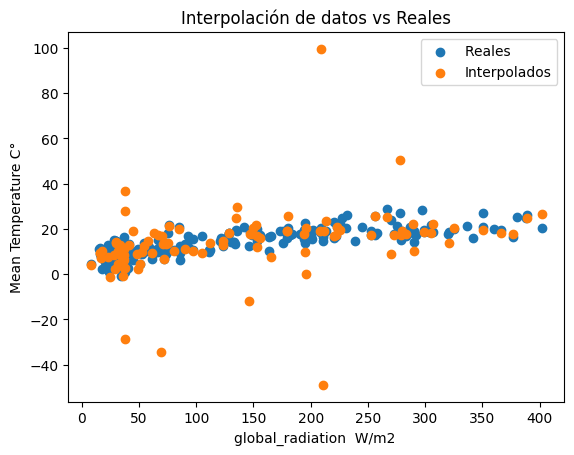

In [ ]:

y=interpolaciones
x=x_values
x.remove(x[99])

b = data_omni['global_radiation']
n = data_omni['mean_temp']
plt.scatter(b, n, label="Reales ")
plt.scatter(x, y, label="Interpolados")
plt.xlabel("global_radiation  W/m2 ")
plt.ylabel("Mean Temperature C°")
plt.title("Interpolación de datos vs Reales")
plt.legend()
plt.show()
